#  Introduction To Equivariance and Equivariant Modeling

## Table of Contents:
* [Introduction](#introduction)
* [What is Equivariance](#equivariance)
* [Why Do We Need Equivariance](#whyeq)
* [Example](#ex)
* [References](#ref)

## Introduction <a class="anchor" id="introduction"></a>
In the preceding sections of this tutorial series, we focused on training models using DeepChem for various applications. However, we haven't yet addressed the important topic of equivariant modeling.

Equivariant modeling ensures that the relationship between input and output remains consistent even when subjected to symmetry operations. By incorporating equivariant modeling techniques, we can effectively analyze and predict diverse properties by leveraging the inherent symmetries present in the data. This is particularly valuable in the fields of cheminformatics, bioinformatics, and material sciences, where understanding the interplay between symmetries and properties of molecules and materials is critical.

This tutorial aims to explore the concept of equivariance and its significance within the domains of chemistry, biology, and material sciences. We will delve into the reasons why equivariant modeling is vital for accurately characterizing and predicting the properties of molecules and materials. By the end, you will have a solid understanding of the importance of equivariance and how it can significantly enhance our modeling capabilities in these areas.

You can follow this tutorial using the Google Colab. If you'd like to open this notebook in colab, you can use the following link.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/deepchem/deepchem/blob/master/examples/tutorials/Introduction_to_Equivariance.ipynb)

## What is Equivariance <a class="anchor" id="equivariance"></a>

A key aspect of the structure in our data is the presence of certain symmetries. To effectively capture this structure, our model should incorporate our knowledge of these symmetries.Therefore, our model should retain the symmetries of the input data in its outputs. In other words, when we apply a symmetry operation (denoted by σ) to the input and pass it through the model, the result should be the same as applying σ to the output of the model.

Mathematically, we can express this idea as an equation: 

                                                f(σ(x)) = σ(f(x))

Here, f represents the function learned by our model. If this equation holds for every symmetry operation in a collection S, we say that f is equivariant with respect to S.

While a precise definition of equivariance involves group theory and allows for differences between the applied symmetry operations on the input and output, we'll focus on the case where they are identical to keep things simpler. Group Equivariant Convolutional Networks exemplify this stricter definition of equivariance.

Interestingly, equivariance shares a similarity with linearity. Just as linear functions are equivariant with respect to scalar multiplication, equivariant functions allow symmetry operations to be applied inside or outside the function.

To gain a better understanding, let's consider Convolutional Neural Networks (CNNs). The [image](https://chriswolfvision.medium.com/what-is-translation-equivariance-and-why-do-we-use-convolutions-to-get-it-6f18139d4c59) below demonstrates how CNNs exhibit equivariance with respect to translation: a shift in the input image directly corresponds to a shift in the output features. 

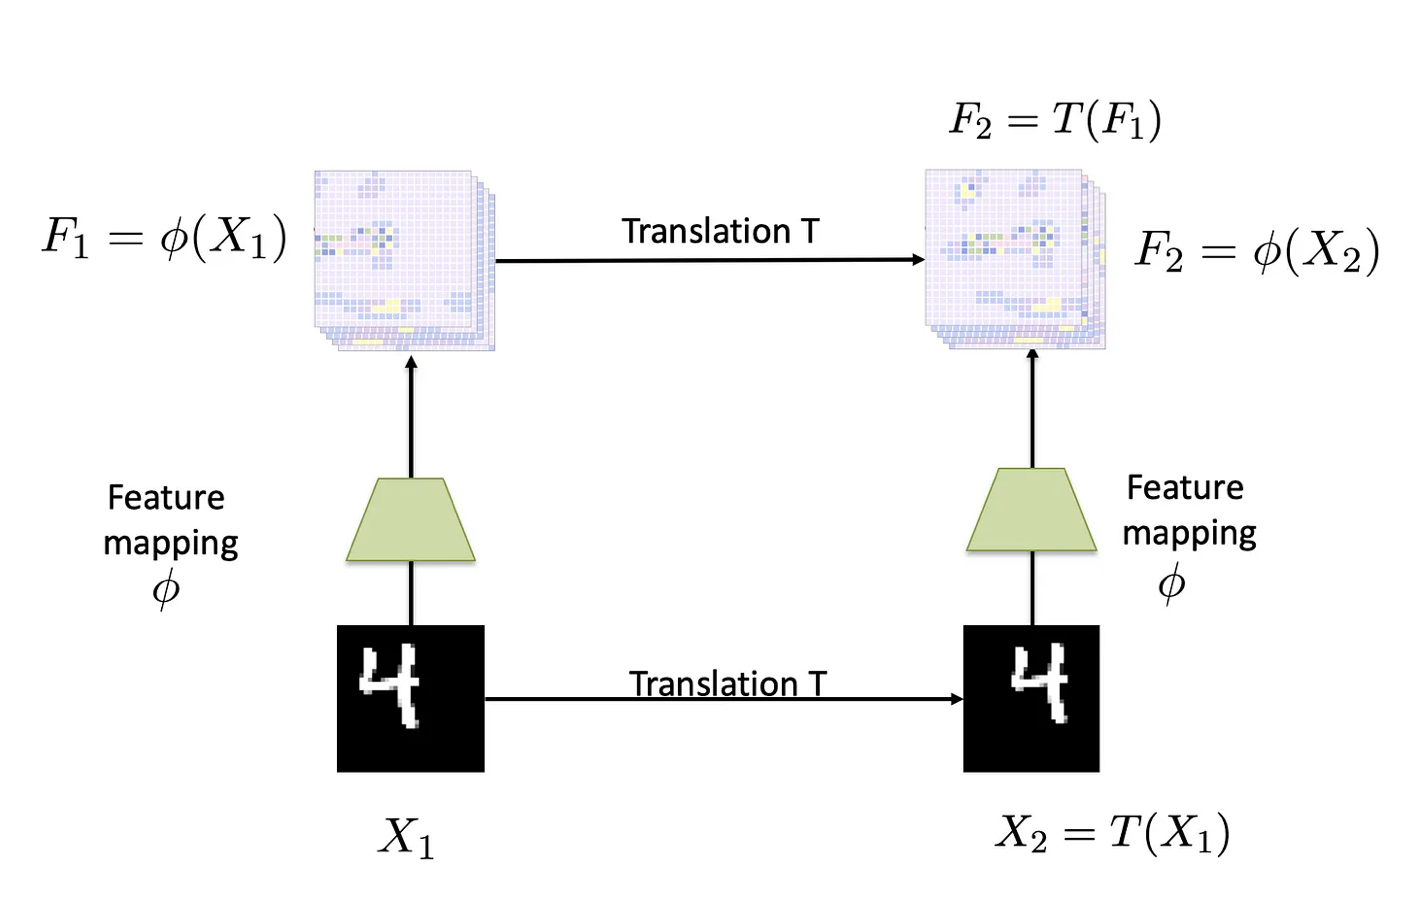

It is also useful to relate equivariance to the concept of invariance, which is more familiar. If a function f is invariant, its output remains unchanged when σ is applied to the input. In this case, the equation simplifies to:

                                                f(σ(x)) = f(x)

An equivariant embedding in one layer can be transformed into an invariant embedding in a subsequent layer. The feasibility and meaningfulness of this transformation depend on the implementation of equivariance. Notably, networks with multiple convolutional layers followed by a global average pooling layer (GAP) achieve this conversion. In such cases, everything up to the GAP layer exhibits translation equivariance, while the output of the GAP layer (and the entire network) becomes invariant to translations of the input.

## Why Do We Need Equivariance <a class="anchor" id="whyeq"></a>
Equivariance is a critical concept in modeling various types of data, particularly when dealing with structures and symmetries. It provides a powerful framework for capturing and leveraging the inherent properties and relationships present in the data. In this section, we will explore the reasons why equivariance is essential and how it is particularly advantageous when working with graph-structured data.

### 1. Preserving Structural Information

Data often exhibits inherent structural properties and symmetries. Equivariant models preserve the structural information present in the data, allowing us to analyze and manipulate it while maintaining consistency under symmetry operations. By doing so, equivariant models capture the underlying relationships and patterns, leading to more accurate and meaningful insights.

### 2. Handling Symmetry and Invariance

Symmetries and invariances are prevalent in many real-world systems. Equivariant models ensure that the learned representations and predictions are consistent under these symmetries and invariances. By explicitly modeling equivariance, we can effectively handle and exploit these properties, leading to robust and reliable models.

### 3. Improved Generalization

Equivariant models have the advantage of generalizing well to unseen data. By incorporating the known symmetries and structures of the domain into the model architecture, equivariance ensures that the model can effectively capture and utilize these patterns even when presented with novel examples. This leads to improved generalization performance, making equivariant models valuable in scenarios where extrapolation or prediction on unseen instances is crucial.

### 4. Efficient Processing of Graph-Structured Data

Graph-structured data possess rich relational information and symmetries. Equivariant models specifically tailored for graph data offer a natural and efficient way to model and reason about these complex relationships. By considering the symmetries of the graph, equivariant models can effectively capture the local and global patterns, enabling tasks such as node classification, link prediction, and graph generation.



## Example <a class="anchor" id="ex"></a>
Traditional machine learning (ML) algorithms face challenges when predicting molecular properties due to the representation of molecules. Typically, molecules are represented as 3D Cartesian arrays with a shape of (points, 3). However, neural networks (NN) cannot directly process such arrays because each position in the array lacks individual significance. For instance, a molecule can be represented by one Cartesian array centered at (0, 0, 0) and another centered at (15, 15, 15), both representing the same molecule but with distinct numerical values. This exemplifies translational variance. Similarly, rotational variance arises when the molecule is rotated instead of translated.

In these examples, if the different arrays representing the same molecule are inputted into the NN, it would perceive them as distinct molecules, which is not the case. To address these issues of translational and rotational variance, considerable efforts have been devoted to devising alternative input representations for molecules.
Let’s demonstrate with some code how to go about creating functions that obey set of equivariances. We won’t be training these models because training has no effect on equivariances.

To define the molecule, we represent it as a collection of coordinates (denoted as $\mathbf{R}_i$) and corresponding features (denoted as $\mathbf{X}_i$). The features are encoded as one-hot vectors, where [1, 0] indicates a carbon atom, and [0, 1] indicates a hydrogen atom. In this specific example, our focus is on predicting the energy associated with the molecule. It's important to note that we will not be training our models, meaning the predicted energy values will not be accurate.

Let's define a random molecule with 12 atoms as an example:

In [47]:
import numpy as np
np.random.seed(42) # seed for reproducibility

R_i = np.random.rand(12, 3) # 12 atoms with xyz coordinates
N = R_i.shape[0] # number of atoms
X_i = np.zeros((N, 2)) # feature vectors for the atoms with shape (N, 2)
X_i[:4, 0] = 1
X_i[4:, 1] = 1

An example of a model that lacks equivariances is a one-hidden layer dense neural network. In this model, we concatenate the positions and features of our data into a single input tensor, which is then passed through a dense layer. The dense layer utilizes the hyperbolic tangent (tanh) activation function and has a hidden layer dimension of 16. The output layer, which performs regression to energy, does not have an activation function. The weights of the model are always initialized randomly.

Let's define our hidden model and initialize the weights:

In [30]:
def hidden_model(r: np.ndarray, x: np.ndarray, w1: np.ndarray, w2: np.ndarray, b1: np.ndarray, b2: float) -> np.ndarray:
    r"""Computes the output of a 1-hidden layer neural network model.

    Parameters
    ----------
        r : np.ndarray 
            Input array for position values.
            Shape: (num_atoms, num_positions)
        x : np.ndarray
            Input array for features.
            Shape: (num_atoms, num_features)
        w1 : np.ndarray
            Weight matrix for the first layer.
            Shape: (num_positions + num_features, hidden_size)
        w2 : np.ndarray
            Weight matrix for the second layer.
            Shape: (hidden_size, output_size)
        b1 : np.ndarray
            Bias vector for the first layer.
            Shape: (hidden_size,)
        b2 : float
            Bias value for the second layer.

    Returns
    -------
        float
            Predicted energy of the molecule
    """
    i = np.concatenate((r, x), axis=1).flatten()  # Stack inputs into one large input
    v = np.tanh(i @ w1 + b1)  # Apply activation function to first layer
    v = v @ w2 + b2  # Multiply with weights and add bias for the second layer
    return v


# Initialize weights for a network with hidden size is 16
w1 = np.random.normal(size=(N * 5, 16))  # 3(#positions) + 2(#features) = 5
b1 = np.random.normal(size=(16,))        
w2 = np.random.normal(size=(16,))
b2 = np.random.normal()

Although our model is not trained, we are not concerned about. Since, we only want see if our model is affected by permutations, translations and rotations

In [29]:
import scipy.spatial.transform as transform

rotate = transform.Rotation.from_euler("x", 60, degrees=True) # Rotate around x axis by 60 degrees

permuted_R_i = np.copy(R_i)
permuted_R_i[0], permuted_R_i[1] = R_i[1], R_i[0] # Swap the rows of R_i

print("without change:", hidden_model(R_i, X_i, w1, w2, b1, b2))
print("after permutation:", hidden_model(permuted_R_i, X_i, w1, w2, b1, b2))
print("after translation:", hidden_model(R_i + np.array([3, 3, 3]), X_i, w1, w2, b1, b2))
print("after rotation:", hidden_model(rotate.apply(R_i), X_i, w1, w2, b1, b2))

without change: 9.945112980229641
after permutation: 9.461406567572851
after translation: 5.963826685170721
after rotation: 7.191211524244547


As expected, our model is not invariant to any permutations, translations, or rotations. Let's fix them.

### Permutational Invariance
In a molecular context, the arrangement or ordering of points in an input tensor holds no significance. Therefore, it is crucial to be cautious and avoid relying on this ordering. To ensure this, we adopt a strategy of solely performing atom-wise operations within the network to obtain atomic property predictions. When predicting molecular properties, we need to cumulatively combine these atomic predictions, such as using summation, to arrive at the desired result. This approach guarantees that the model does not depend on the arbitrary ordering of atoms within the input tensor.

Let's fix permutation invariance problem exists in our hidden model.

In [35]:
def hidden_model_perm(r: np.ndarray, x: np.ndarray, w1: np.ndarray, w2: np.ndarray, b1: np.ndarray, b2: float) -> np.ndarray:
    r"""Computes the output of a 1-hidden layer neural network model with permutation invariance.

    Parameters
    ----------
        r : np.ndarray 
            Input array for position values.
            Shape: (num_atoms, num_positions)
        x : np.ndarray
            Input array for features.
            Shape: (num_atoms, num_features)
        w1 : np.ndarray
            Weight matrix for the first layer.
            Shape: (num_positions + num_features, hidden_size)
        w2 : np.ndarray
            Weight matrix for the second layer.
            Shape: (hidden_size, output_size)
        b1 : np.ndarray
            Bias vector for the first layer.
            Shape: (hidden_size,)
        b2 : float
            Bias value for the second layer.

    Returns
    -------
        float
            Predicted energy of the molecule
    """
    i = np.concatenate((r, x), axis=1)  # Stack inputs into one large input
    v = np.tanh(i @ w1 + b1)  # Apply activation function to first layer
    v = np.sum(v, axis=0) # Reduce the output by summing across the axis which gives permutational invariance
    v = v @ w2 + b2  # Multiply with weights and add bias for the second layer
    return v

# Initialize weights
w1 = np.random.normal(size=(5, 16))
b1 = np.random.normal(size=(16,))
w2 = np.random.normal(size=(16,))
b2 = np.random.normal()

In the original implementation, the model computes intermediate activations v for each input position separately and then concatenates them along the axis 0. By summing across axis 0  with (np.sum(v, axis=0)), the model effectively collapses all the intermediate activations into a single vector, regardless of the order of the input positions.

This reduction operation allows the model to be permutation invariant because the final output is only dependent on the aggregated information from the intermediate activations and is not affected by the specific order of the input positions. Therefore, the model produces the same output for different permutations of the input positions, ensuring permutation invariance.

Now let's see if this changes affected our model's sensitivity to permutations.

In [36]:
print("without change:", hidden_model_perm(R_i, X_i, w1, w2, b1, b2))
print("after permutation:", hidden_model_perm(permuted_R_i, X_i, w1, w2, b1, b2))
print("after translation:", hidden_model_perm(R_i + np.array([3, 3, 3]), X_i, w1, w2, b1, b2))
print("after rotation:", hidden_model_perm(rotate.apply(R_i), X_i, w1, w2, b1, b2))

without change: -19.370847873678944
after permutation: -19.370847873678944
after translation: -67.71502903638384
after rotation: 5.311140035302996


Indeed! As anticipated, our model demonstrates invariance to permutations while remaining sensitive to translations or rotations.
### Translational Invariance
To address the issue of translational variance in modeling molecules, one approach is to compute the distance matrix of the molecule. This distance matrix provides a representation that is invariant to translation. However, this approach introduces a challenge as the distance features change from having three features per atom to $N \times 3$ features per atom. Consequently, we have introduced a dependency on the number of atoms in our distance features, making it easier to inadvertently break permutation invariance. To mitigate this issue, we can simply sum over the newly added axis, effectively collapsing the information into a single value. This summation ensures that the model remains invariant to permutations, restoring the desired permutation invariance property.

Let's fix translation invariance problem exists in our hidden model 

In [50]:
def hidden_model_permute_translate(r: np.ndarray, x: np.ndarray, w1: np.ndarray, w2: np.ndarray, b1: np.ndarray, b2: float) -> np.ndarray:
    r"""Computes the output of a 1-hidden layer neural network model with permutation and translation invariance.

    Parameters
    ----------
        r : np.ndarray 
            Input array for position values.
            Shape: (num_atoms, num_positions)
        x : np.ndarray
            Input array for features.
            Shape: (num_atoms, num_features)
        w1 : np.ndarray
            Weight matrix for the first layer.
            Shape: (num_positions + num_features, hidden_size)
        w2 : np.ndarray
            Weight matrix for the second layer.
            Shape: (hidden_size, output_size)
        b1 : np.ndarray
            Bias vector for the first layer.
            Shape: (hidden_size,)
        b2 : float
            Bias value for the second layer.

    Returns
    -------
        float
            Predicted energy of the molecule
    """
    d = r - r[:, np.newaxis] # Compute pairwise distances using broadcasting

    # Stack inputs into one large input of N x N x 5
    # Concatenate doesn't broadcast, so we manually broadcast the Nx2 x matrix
    # into N x N x 2
    i = np.concatenate((d, np.broadcast_to(x, (d.shape[:-1] + x.shape[-1:]))), axis=-1)
    v = np.tanh(i @ w1 + b1)  # Apply activation function to first layer

    v = np.sum(v, axis=(0, 1)) # Reduce the output over both axes by summing
    v = v @ w2 + b2  # Multiply with weights and add bias for the second layer
    return v


To achieve translational invariance, the function calculates pairwise distances between the position values in the r array. This is done by subtracting r from r[:, np.newaxis], which broadcasts r along a new axis, enabling element-wise subtraction.

The pairwise distance calculation is based on the fact that subtracting the positions r from each other effectively measures the distance or difference between them. By including the pairwise distances in the input, the model can learn and capture the relationship between the distances and the features. This allows the model to be invariant to translations, meaning that shifting the positions within each set while preserving their relative distances will result in the same output.

Now let's see if this changes affected our model's sensitivity to permutations.

In [51]:
print("without change:", hidden_model_permute_translate(R_i, X_i, w1, w2, b1, b2))
print("after permutation:", hidden_model_permute_translate(permuted_R_i, X_i, w1, w2, b1, b2))
print("after translation:", hidden_model_permute_translate(R_i + np.array([3, 3, 3]), X_i, w1, w2, b1, b2))
print("after rotation:", hidden_model_permute_translate(rotate.apply(R_i), X_i, w1, w2, b1, b2))

without change: 193.79734623037373
after permutation: 193.79734623037385
after translation: 193.79734623037368
after rotation: 188.36773620787383


Yes! Our model is invariant to both permutations and translations but not to rotations.

### Rotational Invariance
Atom-centered symmetry functions exhibit rotational invariance due to the invariance of the distance matrix. While this property is suitable for tasks where scalar values, such as energy, are predicted from molecules, it poses a challenge for problems that depend on directionality. In such cases, achieving rotational equivariance is desired, where the output of the network rotates in the same manner as the input. Examples of such problems include force prediction and molecular dynamics.

To address this, we can convert the pairwise vectors into pairwise distances. To simplify the process, we utilize squared distances. This conversion allows us to incorporate directional information while maintaining simplicity. By considering the squared distances, we enable the network to capture and process the relevant geometric relationships between atoms, enabling rotational equivariance and facilitating accurate predictions for direction-dependent tasks.

In [52]:
def hidden_model_permute_translate_rotate(r: np.ndarray, x: np.ndarray, w1: np.ndarray, w2: np.ndarray, b1: np.ndarray, b2: float) -> np.ndarray:
    r"""Computes the output of a 1-hidden layer neural network model with permutation, translation, and rotation invariance.

    Parameters
    ----------
        r : np.ndarray 
            Input array for position values.
            Shape: (num_atoms, num_positions)
        x : np.ndarray
            Input array for features.
            Shape: (num_atoms, num_features)
        w1 : np.ndarray
            Weight matrix for the first layer.
            Shape: (num_positions, hidden_size)
        w2 : np.ndarray
            Weight matrix for the second layer.
            Shape: (hidden_size, output_size)
        b1 : np.ndarray
            Bias vector for the first layer.
            Shape: (hidden_size,)
        b2 : float
            Bias value for the second layer.

    Returns
    -------
        float
            Predicted energy of the molecule
    """
    # Compute pairwise distances using broadcasting
    d = r - r[:, np.newaxis]
    # Compute squared distances
    d2 = np.sum(d**2, axis=-1, keepdims=True)

    # Stack inputs into one large input of N x N x 3
    # Concatenate doesn't broadcast, so we manually broadcast the Nx2 x matrix
    # into N x N x 2
    i = np.concatenate((d2, np.broadcast_to(x, (d2.shape[:-1] + x.shape[-1:]))), axis=-1)
    v = np.tanh(i @ w1 + b1)  # Apply activation function to first layer

    # Reduce the output over both axes by summing
    v = np.sum(v, axis=(0, 1))

    v = v @ w2 + b2  # Multiply with weights and add bias for the second layer
    return v

# Initialize weights
w1 = np.random.normal(size=(3, 16))
b1 = np.random.normal(size=(16,))
w2 = np.random.normal(size=(16,))
b2 = np.random.normal()

The hidden_model_permute_trans_rotate function achieves rotational invariance through the utilization of pairwise squared distances between atoms, instead of the pairwise vectors themselves. By using squared distances, the function is able to incorporate directional information while still maintaining simplicity in the calculation.

Squared distances inherently encode geometric relationships between atoms, such as their relative positions and orientations. This information is essential for capturing the directionality of interactions and phenomena in tasks like force prediction and molecular dynamics, where rotational equivariance is desired.

The conversion from pairwise vectors to pairwise squared distances allows the model to capture and process these geometric relationships. Since squared distances only consider the magnitudes of vectors, disregarding their directions, the resulting network output remains invariant under rotations of the input.

Now let's see if this changes affected our model's sensitivity to rotations.

In [30]:
print("without change:", hidden_model_permute_trans_rotate(R_i, X_i, w1, w2, b1, b2))
print("after permutation:", hidden_model_permute_trans_rotate(permuted_R_i, X_i, w1, w2, b1, b2))
print("after translation:", hidden_model_permute_trans_rotate(R_i + np.array([3, 3, 3]), X_i, w1, w2, b1, b2))
print("after rotation:", hidden_model_permute_trans_rotate(rotate.apply(R_i), X_i, w1, w2, b1, b2))

without change: 585.1386319324105
after permutation: 585.1386319324106
after translation: 585.1386319324105
after rotation: 585.1386319324105


Yes! Now our model is invariant to both permutations, translations, and rotations.

With these new changes, our model exhibits improved representation capacity and generalization while preserving the symmetry of the molecules.

# References <a class="anchor" id="ref"></a>
* Bronstein, M.M., Bruna, J., Cohen, T., & Velivckovi'c, P. (2021). Geometric Deep Learning: Grids, Groups, Graphs, Geodesics, and Gauges. ArXiv, abs/2104.13478.

* White, A.D. (2022). Deep learning for molecules and materials. Living Journal of Computational Molecular Science.

* Geiger, M., & Smidt, T.E. (2022). e3nn: Euclidean Neural Networks. ArXiv, abs/2207.09453.


# Congratulations! Time to join the Community!

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:

## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.

## Join the DeepChem Gitter
The DeepChem [Gitter](https://gitter.im/deepchem/Lobby) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!